Strawberry Fields can be used to access full-stack photonic QC based on silicon chips developed by Xanadu. Xanadu currently has Borealis and X8 chips which are available over the cloud. SF can be used to build, execute, and manage quantum programs ran on real silicon photonic devices.

In order to have an access, we need to sign up on Xanadu Cloud (XC) and create an account.

Some photonic quantum computers use discrete numbers of photons to carry out computations in the traditional “discrete variable” or “qubit” model. Our Borealis and X8 architectures are very different in that they follow the “continuous variable” model; instead of using discrete numbers of photons, we use squeezed states, programmable linear optical transformations, and photon counting. In the near-term Noisy Intermediate-Scale Quantum (NISQ) era, this gives access to a very different set of problems than what is available using traditional discrete-variable machines.

In the future, when error correction, fault tolerance, and universality is achieved, all types of quantum computers will give access to the same types of algorithms. However, the photonic approach maintains some important technological advantages.

It is compatible with room-temperature operation—the Borealis and X8 chips do not require cooling (though the photon detectors still do require some cooling). This stands in contrast with the approach based on superconducting circuits, which will always require extremely cold temperatures.

Photonics enable the use of special multiplexing techniques to scale up the number of available qubits to the millions or billions that will eventually be needed. Borealis, our time-domain multiplexing chip, is an example of this.

Finally, using light to encode quantum information allows us to network quantum computers very easily; communicating between two chips is as simple as linking them by a conventional optical fiber.

# Photonic quantum computing platform

There are several quantum computing platform that shows a good potential to be used in real-life application settings such as superconductor, ion-trapped, and photonics.

Photonic quantum computing platform itself has several advantages that makes it stood up against the other computing platforms:
1. Can work in room-temperature operation
2. There is special multiplexing techniques that makes the platform scalable
3. Easy to build quantum computer network as it can be integrated to the existing optical fiber infrastructure

Given the practical nature of the photonic quantum computing platform, it is interesting to study them in more detailed.

Quantum computer based on photonics can be classified into two main categories:
1. Discrete variable/ qubit based
2. Continuous variable/ qumodes based

You may have seen the example for the first case in QBronze and QSilver where the information is encoded in the photon by looking at which path the photon take.

For the photonic quantum computer from Xanadu, it is based on the second case instead, where the information is encoded in some continuous variable. Their computer's architecture is based on squeezed state, programmable linear optical transformationa and photon counting.

The continuous variable nature of the photonic quantum computing platform gives the advantage especially in the near term Noisy Intermediate-Scale Quantum (NISQ) era where it can solve a set of problems that is not easily solvable by using the traditional discrete variable quantum computer model.

Xanadu has two main devices for their quantum computer:
1. Borealis
2. X8

The two devices above have different circuit architectures that are best used for different type of applications.

# Borealis hardware

Borealis chip is based on time-domain multiplexing technique that makes it scalable in the number of entangled qumodes without expanding the physical setup.

The architecture in 3D and block diagram are shown in the figures below.

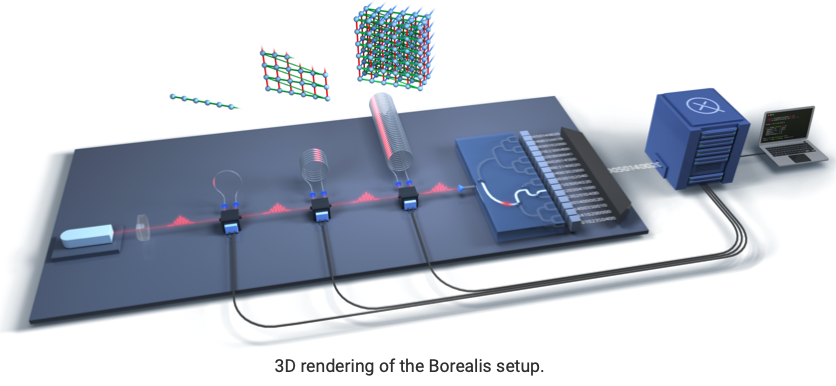

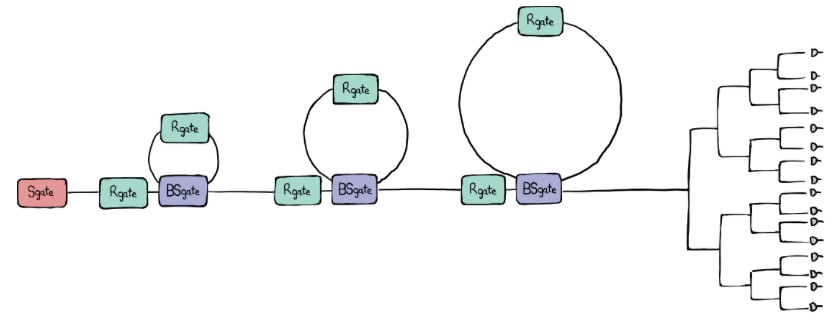

The architecture is mainly composed with the following components:
1. Squeezer: up to 216 time-ordered squeezed states 
2. Three optical delay loops with different delay line: rotation and beam splitter
3. Binary tree of one to 16 spatial modes
4. Photon-number resolving detectors

Now, we would like to try to access the device. First, retrieve our token and run the code below to gain access to the device.

In [2]:
token="eyJhbGciOiJIUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICIwYTdjOGE5Yi1lMzdkLTQ0MzItOTU2OC0xNzI3YzEwNmYyMzEifQ.eyJpYXQiOjE2NjEyNzk0MDIsImp0aSI6IjM0ZGEwNTMzLTFkZjEtNDcxNS04ZTRiLTZmNjBlYjY1YTBlOSIsImlzcyI6Imh0dHBzOi8vcGxhdGZvcm0ueGFuYWR1LmFpL2F1dGgvcmVhbG1zL3BsYXRmb3JtIiwiYXVkIjoiaHR0cHM6Ly9wbGF0Zm9ybS54YW5hZHUuYWkvYXV0aC9yZWFsbXMvcGxhdGZvcm0iLCJzdWIiOiIwYjMxZGE3Yy1hYWE3LTQ3Y2QtYjFkYy04MDA0MjdjNTcyNWMiLCJ0eXAiOiJPZmZsaW5lIiwiYXpwIjoicHVibGljIiwic2Vzc2lvbl9zdGF0ZSI6ImYyOWZjNDcyLTI3MDQtNGFmOC05Yzk0LWJiNzI1YzQ2N2MzZCIsInNjb3BlIjoicHVibGljLXJvbGVzIHByb2ZpbGUgZW1haWwgb2ZmbGluZV9hY2Nlc3MiLCJzaWQiOiJmMjlmYzQ3Mi0yNzA0LTRhZjgtOWM5NC1iYjcyNWM0NjdjM2QifQ.dA7G4sOmFNbahQEcw3rf3WW7fzzDQGAxDNK-p2koSJI"

In [4]:
import xcc
settings = xcc.Settings(REFRESH_TOKEN=token)
settings.save()

In [5]:
import strawberryfields as sf
import numpy as np

eng = sf.RemoteEngine("borealis")
device = eng.device

In [ ]:
from strawberryfields.ops import Sgate, Rgate, BSgate, MeasureFock

prog = sf.TDMProgram(N)

with prog.context(*gate_args_list) as (p, q):
    Sgate(p[0]) | q[n[0]]
    for i in range(len(delays)):
        Rgate(p[2 * i + 1]) | q[n[i]]
        BSgate(p[2 * i + 2], np.pi / 2) | (q[n[i + 1]], q[n[i]])
    MeasureFock() | q[0]

shots = 10_000
results = eng.run(prog, shots=shots, crop=True)
print(results.samples)

In [9]:
from strawberryfields.ops import Sgate, Rgate, BSgate, MeasureHomodyne

In [11]:
n=6
prog= sf.Program(n)

vac_modes = 1  # This is an ancilla mode that is used at the beginning of the protocol
shots = 1
r = 4
alpha = [
    np.arccos(np.sqrt(1 / (n - i + 1))) if i != n + 1 else 0
    for i in range(n + vac_modes)
]

phi = [0] * (n + vac_modes)
phi[0] = np.pi / 2
theta = [0] * (
    n + vac_modes
)  # We will measure first all the states in the X quadrature


with prog.context as q:
    for i in range(0,n-1):
        Sgate(r) | q[i + 1]
        BSgate(alpha[i]) | (q[i], q[i + 1])
        Rgate(phi[i]) | q[i + 1]
        MeasureHomodyne(theta[i]) | q[i]
eng = sf.Engine("gaussian")

n=1000

#do for 1000 times
q1=np.zeros(n)
q2=np.zeros(n)
q3=np.zeros(n)
q4=np.zeros(n)
q5=np.zeros(n)
for i in range(0,n):
    result = eng.run(prog)
    q1[i]=result.samples[0][0]
    q2[i]=result.samples[0][1]
    q3[i]=result.samples[0][2]
    q4[i]=result.samples[0][3]
    q5[i]=result.samples[0][4]

/Users/casseyliang/anaconda/envs/StrawberryFields/lib/python3.10/site-packages/strawberryfields/backends/gaussianbackend/gaussiancircuit.py:137: RuntimeWarning: overflow encountered in multiply


In [14]:
from matplotlib import pyplot as plt

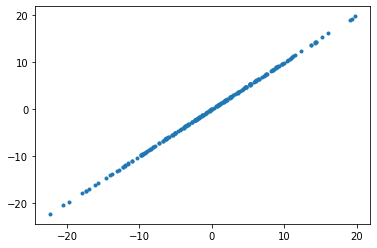

In [16]:
plt.plot(q2,q3,'.')

# X8 hardware

The X8 chip platform is based on nanophotonic silicon nitride waveguides that is fabricated using the same technology that is used to make our current computer processor. The advantage of going on-chip implementation is to make miniaturize and portable devices as well as high level control and stability of optical phases.

As opposed to the Borealis chip, X8 chip is more similar to the conventional quanutm computing chip in which the qumodes used are mainly spatial.

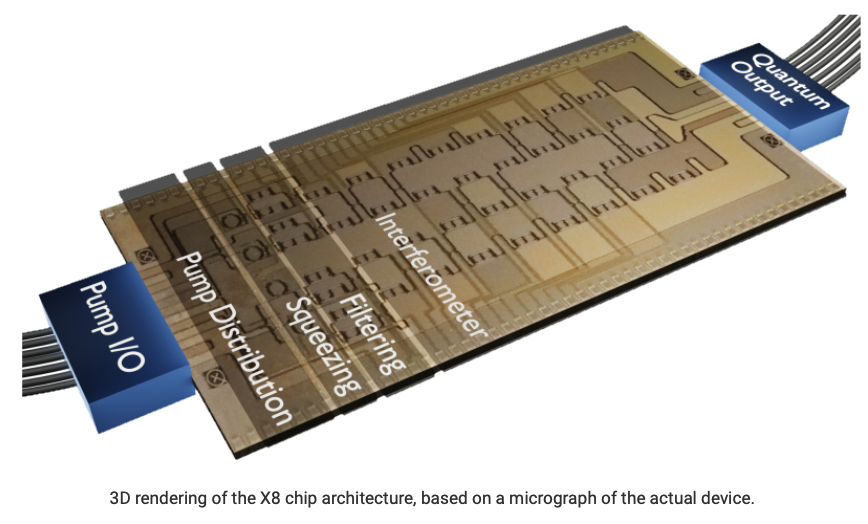

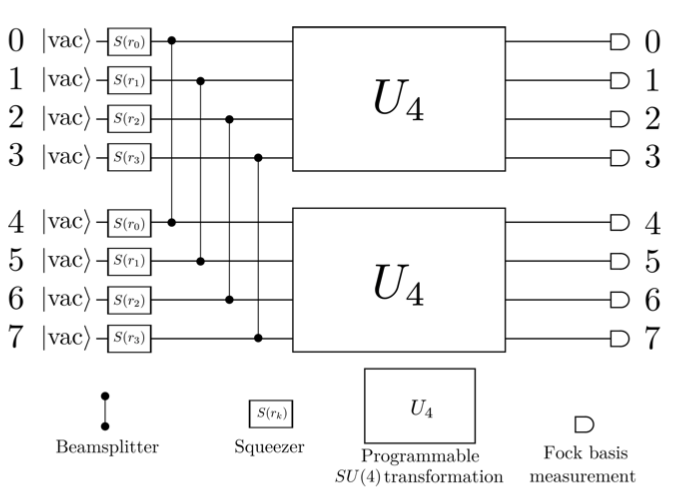

The device architecture can be divided into five stages:
1. Input: coherent state is injected from laser, sent through optical fibers and then coupled to the chip.

2. Squeezing: based on micro-ring resonators device
3. Filtering: to filter out the laser from the squeezed light
4. Programmable linear interferometer: mach-zender inteferometer to define the logical gate
5. Measurement: photon number resolving detectors

In [ ]:
logic gate?